Enter number of points: 20
pl: 41, 184 ql: 55, 403


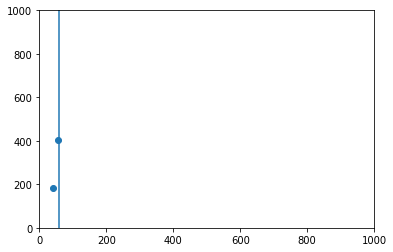

pr: 87, 568 qr: 96, 594


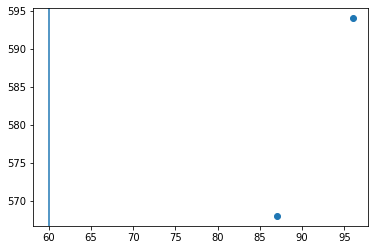

pl: 87, 568 ql: 96, 594


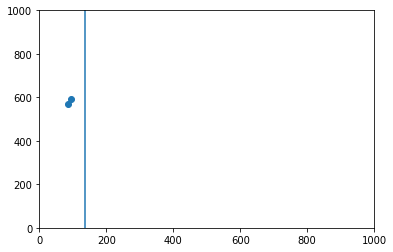

pl: 176, 828 ql: 196, 596


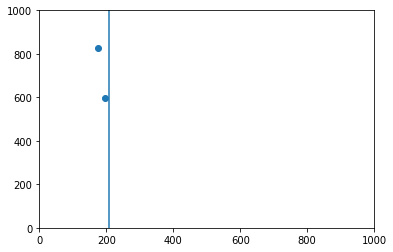

pr: 255, 654 qr: 424, 657


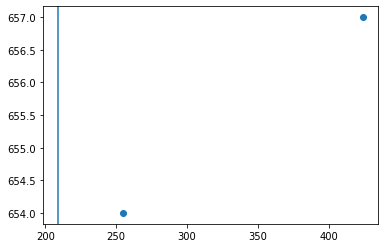

p1: 196, 596 q1: 255, 654
pr: 196, 596 qr: 255, 654


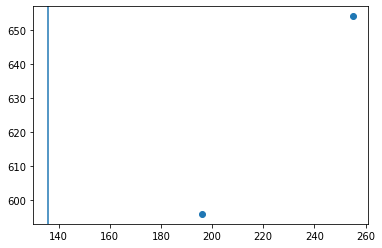

pl: 87, 568 ql: 96, 594


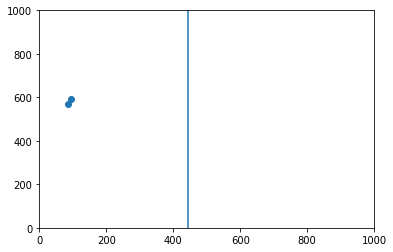

pl: 462, 494 ql: 551, 413


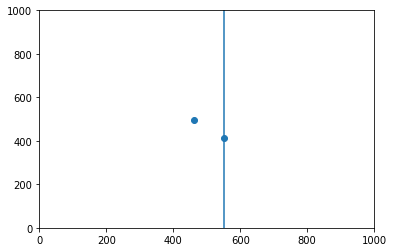

pr: 551, 413 qr: 557, 376


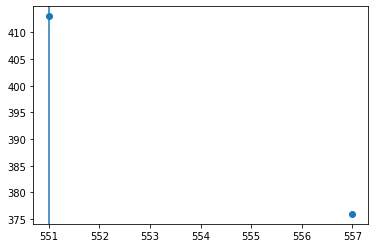

pl: 551, 413 ql: 557, 376


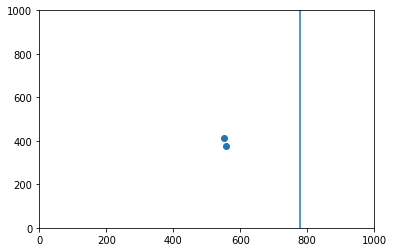

pl: 813, 696 ql: 879, 508


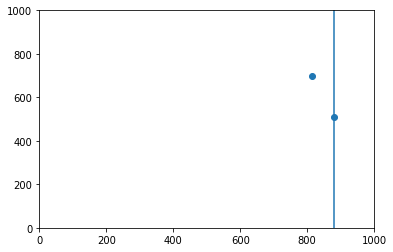

pr: 879, 508 qr: 918, 299


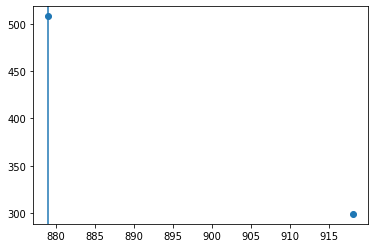

p1: 813, 696 q1: 906, 809
pr: 813, 696 qr: 906, 809


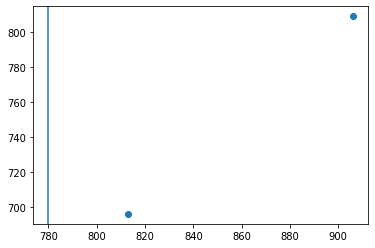

pr: 551, 413 qr: 557, 376


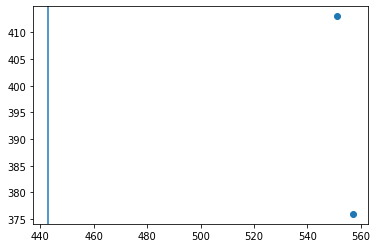

The closest pair of points is: (87, 568) and (96, 594)
Their distance is 27.513633


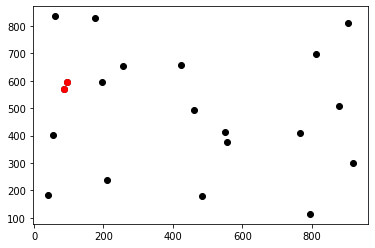

In [16]:
#Zach Macadam
#COSC 40403
#12/15/2019

#Program to implement closest-pair between points on a graph
#Pseudocode from http://www.cs.toronto.edu/~vassos/teaching/c73/handouts/closest-pair-of-points.pdf

import numpy as np
import matplotlib.pyplot as plt
import math

points = []
xcoords = []
ycoords = []

class point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def distance(p1,p2):
    return math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)

def bruteforce_closest_pair(p, n):
    d_min = float("inf")
    for i in range(0, n-1):
        for j in range(i+1, n):
            d = distance(p[i],p[j])
            if d < d_min:
                d_min = d
                index1 = i
                index2 = j
    return index1, index2

def closest_pair(points):
    px = sorted(points, key=lambda p1: p1.x)
    py = sorted(points, key=lambda p1: p1.y)
    return rcp(px, py)

def rcp(px, py):
    if len(px) <= 3:
        p1, p2 = bruteforce_closest_pair(px, len(px))
        return px[p1], px[p2]
    else:
        num_points = len(px)
        left_size = math.ceil(num_points/2)
        right_size = math.floor(num_points/2)
        lx = px[:left_size]
        rx = px[right_size:]
        m = (max(point.x for point in lx) + min(point.x for point in rx))/2
        ly = sorted(lx, key=lambda p1: p1.y)
        ry = sorted(rx, key=lambda p1: p1.y)
        pl, ql = rcp(lx, ly)
        plt.xlim(0,1000)
        plt.ylim(0,1000)
        xc = [pl.x, ql.x]
        yc = [pl.y, ql.y]
        print("pl: %d, %d ql: %d, %d" % (pl.x, pl.y, ql.x, ql.y))
        plt.scatter(xc, yc)
        plt.axvline(x=m)
        plt.show()
        pr, qr = rcp(rx, ry)
        xc1 = [pr.x, qr.x]
        yc1 = [pr.y, qr.y]
        print("pr: %d, %d qr: %d, %d" % (pr.x, pr.y, qr.x, qr.y))
        plt.scatter(xc1, yc1)
        plt.axvline(x=m)
        plt.show()
        delta = min(distance(pl, ql), distance(pr, qr))
        left_rectangle = m-delta
        right_rectangle = m+delta
        b = []
        for i in py:
            if left_rectangle <= i.x <= right_rectangle:
                b.append(i)
        if (len(b) <= 1):
            if distance(pl, ql) <= distance(pr, qr):
                return (pl, ql)
            else:
                return (pr, qr)
        else:
            p1 = b[0]
            q1 = b[1]
            for i in range(0, len(b)):
                for j in range(i+1, len(b)):
                    if distance(b[i], b[j]) < distance(p1, q1):
                        p1,q1 = b[i],b[j]
            if distance(p1, q1) < delta:
                print("p1: %d, %d q1: %d, %d" % (p1.x, p1.y, q1.x, q1.y))
                return (p1,q1)
            elif distance(pl, ql) <= distance(pr, qr):
                return (pl,ql)
            else:
                return(pr, qr)
            
    
        
def scatter(n):
    for i in range(0,n):
        point.x = np.random.randint(1000)
        point.y = np.random.randint(1000)
        xcoords.append(point.x)
        ycoords.append(point.y)
        points.append(point(point.x,point.y))
    
def __main__():
    n = int(input("Enter number of points: "))
    scatter(n)
    a,b = closest_pair(points)
    print("The closest pair of points is:", "(%d, %d) and (%d, %d)" % (a.x, a.y, b.x, b.y))
    print("Their distance is %f" % distance(a, b))
    plt.scatter(xcoords, ycoords, c='black')
    plt.scatter(a.x, a.y, c='red')
    plt.scatter(b.x, b.y, c='red')
    
__main__()

## 

### 